# ML Project 11

+ Bu projede elimizdeki veri seti hastalara ait. Hastalan yaş, cinsiyet, vücut kitle endeksi, sigara içip içmediği, yaşadığı bölge; bağımsız değişkenler olarak verilmiş. Buna karşılık olarak da hastane masrafları da bağımlı değişken olarak verilmiş. Bir regresyon problemi. Normalizasyon gerekeceğini sanmıyorum ancak LabelEncoder veya OneHotEncoder ya da ikisini birden kullanmam gerekebilir. 

## Importing Libraries and Data 

In [1]:
import os 
os.chdir("C:/Users/ogulc/ÖNEMLİ ÇALIŞMALAR")

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
#Model kütüphanelerini, modeli kurarken
#Değerlendirme metriklerini, modeli değerlendirirken

In [3]:
project_11 = pd.read_csv("insurance.csv")

In [4]:
project_11

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Analysing and Visualization Data (EDA)

In [5]:
project_11.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


### .info()

In [6]:
project_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### .shape

In [7]:
project_11.shape

(1338, 7)

### .unique() and .nunique()

In [8]:
project_11.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [9]:
project_11["children"].unique()

array([0, 1, 3, 2, 5, 4])

In [10]:
project_11["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

### .value_counts() and bar graphs

In [11]:
project_11["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

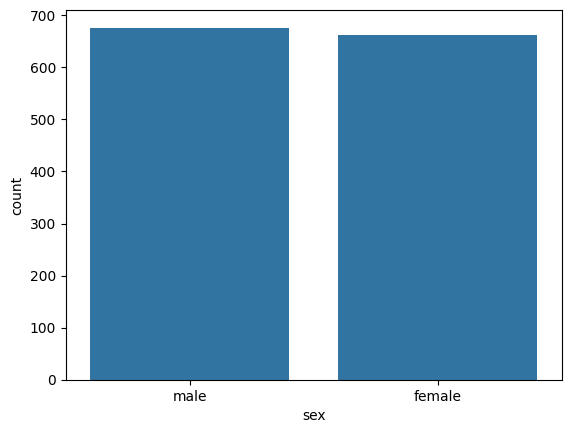

In [12]:
sns.barplot(project_11["sex"].value_counts())

In [13]:
project_11["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

<Axes: xlabel='smoker', ylabel='count'>

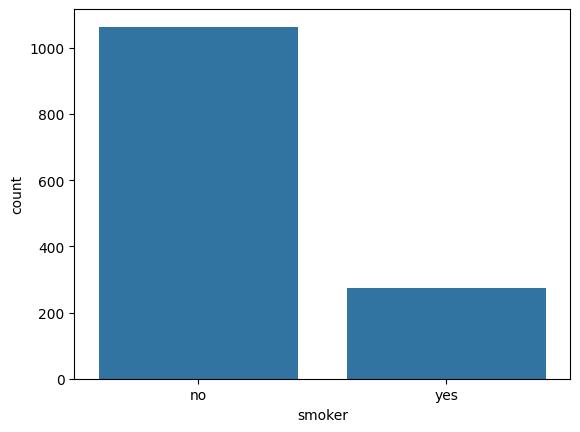

In [14]:
sns.barplot(project_11["smoker"].value_counts())

In [15]:
project_11["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<Axes: xlabel='region', ylabel='count'>

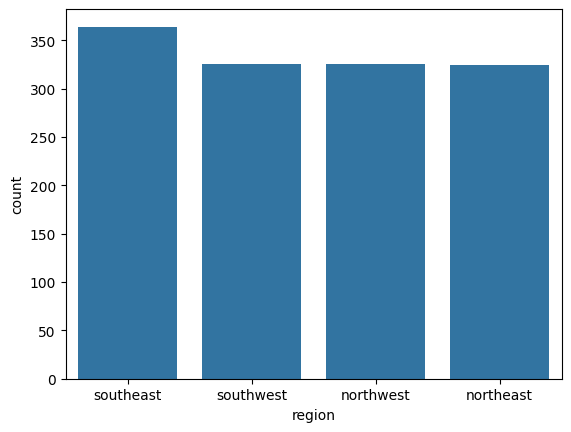

In [16]:
sns.barplot(project_11["region"].value_counts())

In [17]:
project_11["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

<Axes: xlabel='children', ylabel='count'>

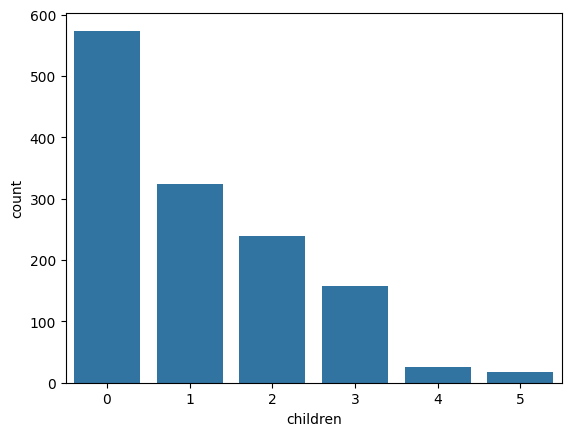

In [18]:
sns.barplot(project_11["children"].value_counts())

### .count()

In [19]:
project_11.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

### .isnull.sum()

In [20]:
project_11.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### .duplicated() and .drop_duplicates()

In [21]:
project_11.duplicated().sum()

np.int64(1)

In [22]:
project_11[project_11.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [23]:
project_11 = project_11.drop_duplicates()

In [24]:
project_11.shape

(1337, 7)

### .describe()

In [25]:
project_11.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


### .corr and .heatmap()

<Axes: >

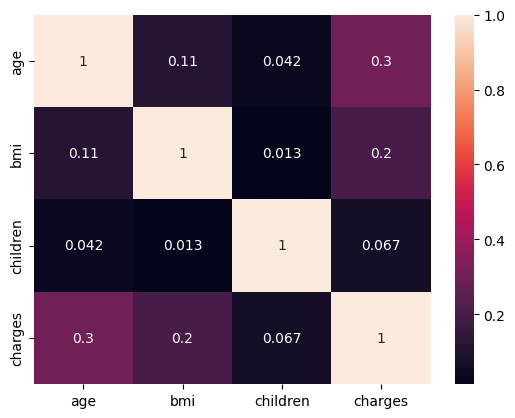

In [26]:
cor = project_11.select_dtypes(include = ["int64", "float64"]).corr()
sns.heatmap(cor, annot = True)

### Saçılım Grafiği

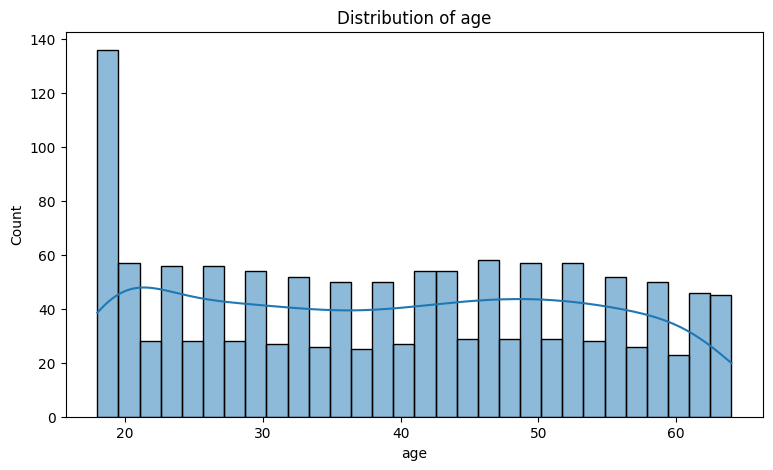

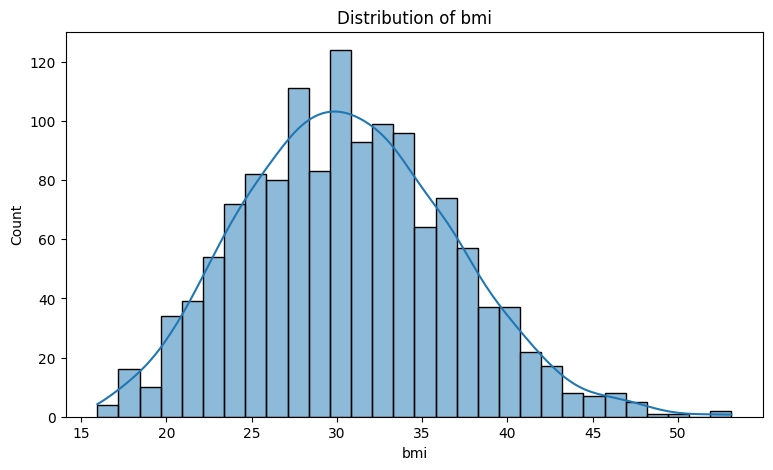

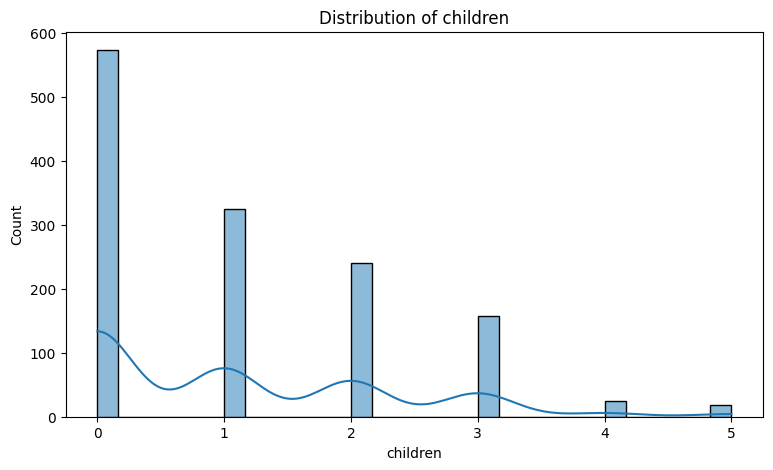

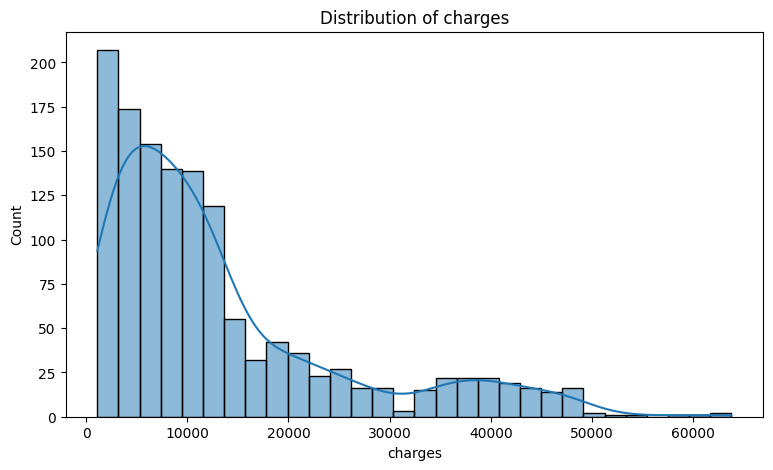

In [27]:
for column in project_11.select_dtypes(include = ["float64", "int64"]):
    plt.figure(figsize=(9, 5))
    sns.histplot(data=project_11, x=column, kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()

### .skew()

In [28]:
numerical_columns = project_11.select_dtypes(include = ["int64", "float64"])

In [29]:
numerical_columns.skew()

age         0.054781
bmi         0.283914
children    0.937421
charges     1.515391
dtype: float64

##  ANOVA and T-Test for Understanding Which Categorical Column Effective on `charges`

+ **charges** sütunu numerik olduğu için, kategorik sütunların bu sütun ile ilişkisi görebilmek için **T-test (İki kategorili sütunlar)** ve **ANOVA (İkiden fazla kategorili sütunlar)** testlerini kullanacağız. Bunun sonucunda, ilişkili olan sütunları `LabelEncoder`, olmayan sütunları ise `OneHotEncoder` ile işleyeceğiz

In [30]:
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

In [39]:
from scipy.stats import ttest_ind, f_oneway

# Kategorik sütunları seçme
categorical_columns = project_11.select_dtypes(include=['object', 'category']).columns

# Sürekli değişken
continuous_variable = 'charges'

# Test sonuçlarını tutmak için bir sözlük
test_results = {}

# Kategorik sütunları dolaşarak uygun testleri uygulama
for column in categorical_columns:
    unique_values = project_11[column].nunique()
    
    if unique_values == 2:  # İki kategorili değişkenler için T-Testi
        category1 = project_11[project_11[column] == project_11[column].unique()[0]][continuous_variable]
        category2 = project_11[project_11[column] == project_11[column].unique()[1]][continuous_variable]
        
        stat, p = ttest_ind(category1, category2)
        test_results[column] = ('T-Testi', stat, p)
    
    elif unique_values > 2:  # Birden fazla kategorili değişkenler için ANOVA
        groups = [project_11[project_11[column] == category][continuous_variable] for category in project_11[column].unique()]
        
        stat, p = f_oneway(*groups)
        test_results[column] = ('ANOVA', stat, p)

# Test sonuçlarını yazdırma
for column, (test_type, stat, p) in test_results.items():
    print(f"{column} için {test_type} sonucu: Stat=%.3f, p=%.3f" % (stat, p))
    if p > 0.05:
        print('Fark yok (fail to reject H0)')
    else:
        print('Fark var (reject H0)')
    print()

sex için T-Testi sonucu: Stat=-2.124, p=0.034
Fark var (reject H0)

smoker için T-Testi sonucu: Stat=46.645, p=0.000
Fark var (reject H0)

region için ANOVA sonucu: Stat=2.926, p=0.033
Fark var (reject H0)



+ Görüleceği üzere üç sütunun da `charges` ile ilişkisi çıktı. Bu da demek oluyor ki bu kategorik sütunlar `ordinal (sıralı)`. Dolayısıyla LabelEncoder kullanarak işleme yapacağız

### LabelEncoder

In [42]:
label_encoder = LabelEncoder()
related_cols = ["sex", "smoker", "region"]
for column in related_cols:
    project_11[column] = label_encoder.fit_transform(project_11[column].astype(str))

C:\Users\ogulc\AppData\Local\Temp\ipykernel_10092\2137776921.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  project_11[column] = label_encoder.fit_transform(project_11[column].astype(str))
C:\Users\ogulc\AppData\Local\Temp\ipykernel_10092\2137776921.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  project_11[column] = label_encoder.fit_transform(project_11[column].astype(str))
C:\Users\ogulc\AppData\Local\Temp\ipykernel_10092\2137776921.py:4: SettingWithCopyWarning: 
A value is trying to be set on a

In [43]:
project_11

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


### More Analysis After LabelEncoder

<Axes: >

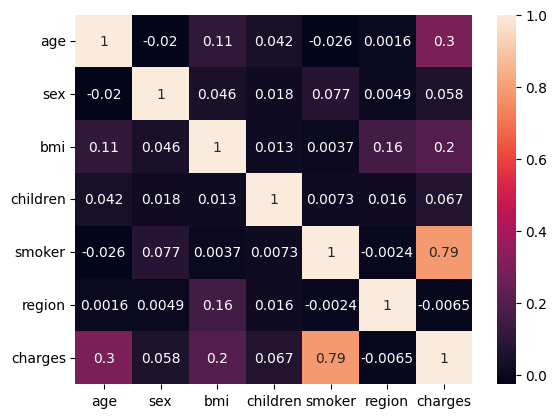

In [46]:
#'charges' sütunu ile korelasyon
sns.heatmap(project_11.corr(), annot = True)

+ Görüleceği üzere `charges` ile `smoker` arasında kuvvetli bir korelasyon var. Bu korelasyonun grafiklerini inceleyelim 

C:\Users\ogulc\AppData\Local\Temp\ipykernel_10092\3929059556.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(project_11[(project_11.smoker == 1)]["charges"],color='c',ax=ax)
C:\Users\ogulc\AppData\Local\Temp\ipykernel_10092\3929059556.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(proje

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

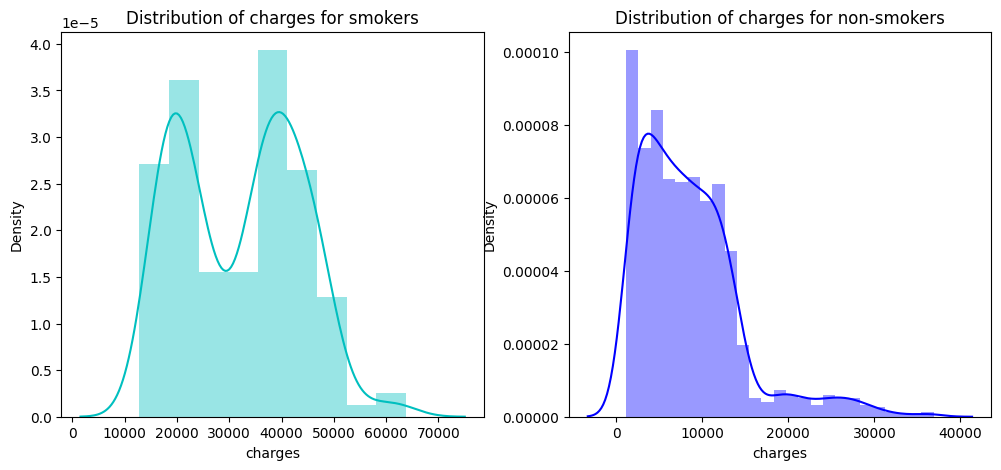

In [48]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(project_11[(project_11.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(project_11[(project_11.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

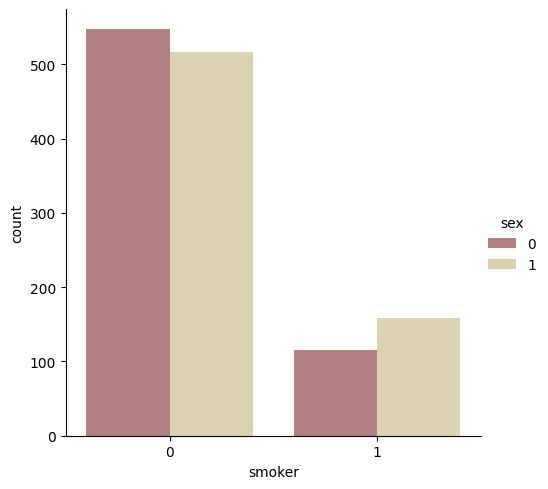

In [49]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=project_11)

## Separating Data

In [50]:
X = project_11.drop(columns = "charges", axis = 1)
y = project_11["charges"]

In [51]:
X.head(3)

,age,sex,bmi,children,smoker,region
0,19,0,27.90,0,1,3
1,18,1,33.77,1,0,2
2,28,1,33.00,3,0,2


In [52]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

## Splitting Data 

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [54]:
print(X.shape, X_train.shape, X_test.shape)

(1337, 6) (1069, 6) (268, 6)


In [55]:
print(y.shape, y_train.shape, y_test.shape)

(1337,) (1069,) (268,)


## Model Training, Evaluating and Compare with DummyRegressor 

In [56]:
from sklearn.dummy import DummyRegressor
dummy_regressor = DummyRegressor(strategy = "mean").fit(X_train, y_train)

In [57]:
print("Dummy Regressor'un Test Setindeki Doğruluğu:", dummy_regressor.score(X_test, y_test))

Dummy Regressor'un Test Setindeki Doğruluğu: -0.008391982350864469


In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
regression_models = {"Decision Tree": DecisionTreeRegressor(),
                   "Random Forest": RandomForestRegressor(),
                   "Gradient Boosting": GradientBoostingRegressor(),
                   "Ada Boost": AdaBoostRegressor(),
                   "KNN": KNeighborsRegressor(),
                   "Linear Regression": LinearRegression(),
                   "Lasso Regression": Lasso(),
                   "Ridge Regression": Ridge(),
                   "Linear SVR": SVR(kernel = "linear"),
                   "RBF SVR": SVR(kernel = "rbf"),
                   "Polynomial SVR": SVR(kernel = "poly")}

In [60]:
model_names = []
train_score = []
test_score = []
mse_score = []
r2score = []

for name, reg in regression_models.items():
    reg.fit(X_train, y_train)
    predictions = reg.predict(X_test)
    score_train = reg.score(X_train, y_train)
    score_test = reg.score(X_test, y_test)
    score_mse = mean_squared_error(y_test, predictions)
    score_r2 = r2_score(y_test, predictions)
    
    model_names.append(name)
    train_score.append(score_train)
    test_score.append(score_test)
    mse_score.append(score_mse)
    r2score.append(score_r2)
    
    print(f"{name} Train setindeki doğruluk: {score_train}")
    print(f"{name} Test setindeki doğruluk: {score_test}")
    print(f"{name} MSE Skoru: {score_mse}")
    print(f"{name} R^2 Skoru: {score_r2}\n")

Decision Tree Train setindeki doğruluk: 1.0
Decision Tree Test setindeki doğruluk: 0.7729373004120761
Decision Tree MSE Skoru: 41724147.96682346
Decision Tree R^2 Skoru: 0.7729373004120761

Random Forest Train setindeki doğruluk: 0.9754312237730847
Random Forest Test setindeki doğruluk: 0.8846649302617897
Random Forest MSE Skoru: 21193518.46099924
Random Forest R^2 Skoru: 0.8846649302617897

Gradient Boosting Train setindeki doğruluk: 0.8931701840243523
Gradient Boosting Test setindeki doğruluk: 0.9010058572477833
Gradient Boosting MSE Skoru: 18190774.035270065
Gradient Boosting R^2 Skoru: 0.9010058572477833

Ada Boost Train setindeki doğruluk: 0.8160071794045942
Ada Boost Test setindeki doğruluk: 0.863846621927319
Ada Boost MSE Skoru: 25019008.86053558
Ada Boost R^2 Skoru: 0.863846621927319

KNN Train setindeki doğruluk: 0.4122115169002336
KNN Test setindeki doğruluk: 0.04977435442244904
KNN MSE Skoru: 174609724.58224344
KNN R^2 Skoru: 0.04977435442244904

Linear Regression Train seti